# RNN -> 주식 예측 모델

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [42]:
xy=np.loadtxt("stock_daily.csv", delimiter=",")
print(xy.shape) #732, 5
xy

(732, 5)


array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       ...,
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02]])

In [43]:
xy=xy[::-1] #뒤에서부터 데이터가 읽어짐

In [44]:
scaler=MinMaxScaler(feature_range=(0,1))
xy=scaler.fit_transform(xy)
x=xy
y=xy[:,[-1]] #close, 종가

In [45]:
xData=[]
yData=[]
seqLength=7 #7일 단위로 트레이닝

In [46]:
for i in range(0, len(y)-seqLength):
    xx=x[i:i+seqLength]
    yy=y[i+seqLength]
    print(xx,"->",yy)
    xData.append(xx)
    yData.append(yy)

80962104 0.81567855 0.82065085 0.12909384 0.82731875]
 [0.83153522 0.84819566 0.85525015 0.15887783 0.86482773]] -> [0.86476956]
[[0.7283466  0.74578848 0.74984431 0.12913866 0.75177622]
 [0.76657973 0.7744036  0.77860135 0.12324101 0.78680799]
 [0.78703667 0.7886533  0.79163    0.14563951 0.7768696 ]
 [0.7761671  0.79596594 0.78711094 0.15621583 0.81207623]
 [0.80962104 0.81567855 0.82065085 0.12909384 0.82731875]
 [0.83153522 0.84819566 0.85525015 0.15887783 0.86482773]
 [0.84622227 0.85345622 0.87090207 0.18725464 0.86476956]] -> [0.88467514]
[[0.76657973 0.7744036  0.77860135 0.12324101 0.78680799]
 [0.78703667 0.7886533  0.79163    0.14563951 0.7768696 ]
 [0.7761671  0.79596594 0.78711094 0.15621583 0.81207623]
 [0.80962104 0.81567855 0.82065085 0.12909384 0.82731875]
 [0.83153522 0.84819566 0.85525015 0.15887783 0.86482773]
 [0.84622227 0.85345622 0.87090207 0.18725464 0.86476956]
 [0.87204144 0.89140731 0.89726759 0.18928924 0.88467514]] -> [0.88750224]
[[0.78703667 0.7886533  0

In [47]:
np.shape(xData) #725, 7, 5
#725:데이터건수, 7:일주일, 5:5개 컬럼
np.shape(yData) #725,1

(725, 1)

In [48]:
trainSize=int(len(xData)*0.7)
testSize=len(yData)-trainSize

In [49]:
trainX, testX=np.array(xData[0:trainSize]),np.array(xData[trainSize:len(xData)])
trainY, testY=np.array(yData[0:trainSize]),np.array(yData[trainSize:len(yData)])

In [50]:
trainX.shape
trainY.shape

(507, 1)

In [51]:
model=Sequential()
model.add(LSTM(1,input_shape=(7,5), return_sequences=False))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 28        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(trainX, trainY, epochs=200)

Epoch 1/200
16/16 [==============================] - 0s 2ms/step - loss: 0.1698
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.1583
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 0.1489
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.1403
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.1311
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.1196
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.1054
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0888
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0720
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 11/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 12/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 13/200
16/16 [=================

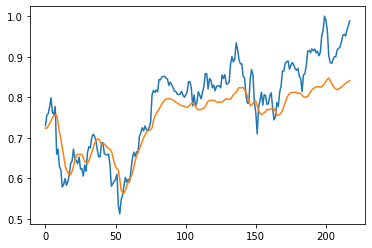

In [53]:
testPredict = model.predict(testX)
# testPredict
plt.plot(testY)
plt.plot(testPredict)